In [1]:
# import packages
import pandas as pd
import numpy as np

In [2]:
# import data
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'

In [3]:
df = pd.read_csv(file_url)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# save dataframe to raw folder
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

# Prepare data

In [9]:
df_cleaned = df.copy()

In [10]:
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

In [12]:
# import test, train split
from sklearn.model_selection import train_test_split

# split 80 /20
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

In [13]:
X_train_cleaned = X_train.copy()

In [22]:
X_train_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,Female,1.771416,-0.844380,-0.585705
4,Female,-0.583546,-1.674190,-0.388498
196,Female,0.386144,2.632916,-0.861795
111,Female,-1.414709,0.143488,0.163682
141,Male,-0.514282,0.617665,1.701898
...,...,...,...,...
136,Female,0.316881,0.538635,-1.690066
133,Female,-0.583546,0.499120,0.834186
105,Female,-1.276181,0.103973,-0.309615
84,Female,-1.276181,-0.212145,0.282006


In [16]:
# import standard scaler and one hot encoder 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [23]:
# Create a list called num_cols that has Age, Annual Income and Sprending score, we do not need Gender

num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [18]:
#instantiate standard scaler

sc = StandardScaler()

Fit and transform the categorical feature of `X_train_cleaned` and replace the data into it

In [24]:
# fit and transform standard scaler to the variables Age, Annual Income (k$) and Spending Score (1-100)
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])
X_train_cleaned[num_cols]

,Age,Annual Income (k$),Spending Score (1-100)
40,1.771416,-0.844380,-0.585705
4,-0.583546,-1.674190,-0.388498
196,0.386144,2.632916,-0.861795
111,-1.414709,0.143488,0.163682
141,-0.514282,0.617665,1.701898
...,...,...,...
136,0.316881,0.538635,-1.690066
133,-0.583546,0.499120,0.834186
105,-1.276181,0.103973,-0.309615
84,-1.276181,-0.212145,0.282006


In [26]:
# create a list called cat_cols containing Gender
cat_cols = ['Gender']

Instantiate a `OneHotEncoder` with `sparse=False` and `drop='first'` and save it to a variable called `ohe`.

Sparse meanding 

In [29]:

ohe = OneHotEncoder(sparse=False, drop='first')

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

**[3.12]** Fit and transform the categorical feature of `X_train_cleaned` and replace the data into it

In [32]:
# Converts cat_cols variable into numerical from categorical  
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])
X_train_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,0.0,1.771416,-0.844380,-0.585705
4,0.0,-0.583546,-1.674190,-0.388498
196,0.0,0.386144,2.632916,-0.861795
111,0.0,-1.414709,0.143488,0.163682
141,1.0,-0.514282,0.617665,1.701898
...,...,...,...,...
136,0.0,0.316881,0.538635,-1.690066
133,0.0,-0.583546,0.499120,0.834186
105,0.0,-1.276181,0.103973,-0.309615
84,0.0,-1.276181,-0.212145,0.282006


In [33]:
# Reset the index for X_train_cleaned

X_train_cleaned.reset_index(drop=True, inplace=True)

In [34]:
X_train_cleaned

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.771416,-0.844380,-0.585705
1,0.0,-0.583546,-1.674190,-0.388498
2,0.0,0.386144,2.632916,-0.861795
3,0.0,-1.414709,0.143488,0.163682
4,1.0,-0.514282,0.617665,1.701898
...,...,...,...,...
155,0.0,0.316881,0.538635,-1.690066
156,0.0,-0.583546,0.499120,0.834186
157,0.0,-1.276181,0.103973,-0.309615
158,0.0,-1.276181,-0.212145,0.282006


### 4. Gaussian Mixture Model

 Import `KElbowVisualizer` from `yellowbrick.cluster`
`KMeans` from `sklearn.cluster`

In [43]:
# import packages
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Note yellowbrick package is a extension to sci-kit learn package to make model selection and hyperparameter tuning easier.
# Under the hood, it’s using Matplotlib.

**[4.2]** Instantiate a `KElbowVisualizer` with an instantied KMeans and k=(2, 15) and save it into a variable called `model`

In [38]:
# This is the K-Elbow visualiser to identify which is the best optimal cluster for K-means clustering. 
model = KElbowVisualizer(KMeans(), k=(2,15))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x40588a3250>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=14,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

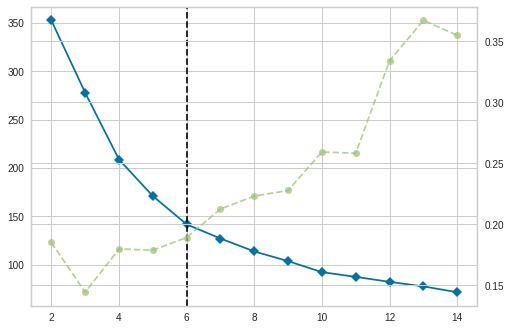

In [39]:
# Fit the K-ElbowVisualizer model with X_train_cleaned
model.fit(X_train_cleaned)

In [41]:
yellowbrick.cluster?

Object `yellowbrick.cluster` not found.


In [56]:
# Task: Save the attribute elbow_value_ from model and save it to a variable called n_clusters

n_clusters = model.elbow_value_
print(f'the number of optimal clusters is: {n_clusters}')

# The elbow score (y-axis)
print(f'the optimal elbow score is: {model.elbow_score_}')

the number of optimal clusters is: 6
the optimal elbow score is: 141.51520366350982


In [57]:
# import Gaussian Mixture from sklearn 
from sklearn.mixture import GaussianMixture

In [58]:
# Instantiate a GaussianMixture with n_components and random_state set and save it into a variable called gmm
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

In [59]:
# use gmm on X_train_cleaned
gmm.fit(X_train_cleaned)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [60]:
# Make a prediction
gmm.predict(X_train_cleaned)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [61]:
#  Convert the first observation of X_train_cleaned into a dataframe 
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()
obs

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.771416,-0.84438,-0.585705


In [62]:
# Make a prediction on obs
gmm.predict(obs)

array([2])

### Build a Pipeline

In [63]:
# Import a pipeline
from sklearn.pipeline import Pipeline

In [64]:
# Create a Pipeline called num_transformer with one step that contains StandardScaler

num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [65]:
# Create a Pipeline called cat_transformer with one step that contains OneHotEncoder

cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)


In [66]:
# import function
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer called preprocessor with 2 steps containing num_transformer and cat_transformer that will be applied 
# respectively to num_cols and cat_cols

preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ]
)

In [69]:
# Create a Pipeline called gm_pipe that contains 2 steps preprocessor and another that instantiate a GaussianMixture with same parameters as previously
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [70]:
# Fit gmm_pipe with X_train
gmm_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_cols',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                         

In [72]:
# Make predictions on X_train
gmm_pipe.predict(X_train)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

 Transform the first observation of `X_train` into a dataframe, call it `obs` and make prediction on it

In [73]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([2])

In [74]:
# with transpose 
obs

,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,Female,65,38,35


In [75]:
# without transpose
pd.DataFrame(X_train.iloc[0])

,40
Gender,Female
Age,65
Annual Income (k$),38
Spending Score (1-100),35


Import `dump` from `joblib` package and save `gmm_pipe` into `models` folder

In [76]:
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')

['../models/gmm_pipeline.joblib']